# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"

LGMVIP AUGUST-23

AUTHOR - NIKHIL ESHWAR

Intermediate Level Task

TASK-5- Exploratory Data Analysis on Dataset - Terrorism :

As a security/defense analyst, trying to find out the hot zone of terrorism.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Terrorism.csv',encoding='ISO-8859-1',low_memory=False)

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.shape

(181691, 135)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [8]:
df.columns

Index(['eventid', 'Year', 'Month', 'day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
df= df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [10]:
df.columns

Index(['Year', 'Month', 'day', 'Country', 'State', 'Region', 'City',
       'latitude', 'longitude', 'Attacktype', 'kill', 'Wound', 'target1',
       'summary', 'Group', 'Targettype', 'Weapon', 'motive'],
      dtype='object')

# Checking Duplicate Values

In [11]:
df.duplicated().sum()

9498

In [12]:
df=df.drop_duplicates()

# Checking Null Values

In [13]:
df.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4011
longitude       4012
Attacktype         0
kill            9434
Wound          15268
target1          544
summary        59092
Group              0
Targettype         0
Weapon             0
motive        122284
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.drop(['motive','summary','latitude','longitude'],axis=1,inplace=True)

In [16]:
df.shape

(172193, 14)

In [17]:
df.dropna(axis=0, inplace=True)
df.shape

(155072, 14)

In [18]:
df.describe()

,Year,Month,day,kill,Wound
count,155072.000000,155072.000000,155072.000000,155072.000000,155072.000000
mean,2003.651852,6.483524,15.525188,2.225270,3.323314
std,12.681052,3.389597,8.806438,10.066846,37.090711
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.000000,4.000000,8.000000,0.000000,0.000000
50%,2010.000000,6.000000,15.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1384.000000,8191.000000


In [19]:
df['Wound'] = df['Wound'].fillna(0)
df['kill'] = df['kill'].fillna(0)

In [20]:
df.isnull().sum()

Year          0
Month         0
day           0
Country       0
State         0
Region        0
City          0
Attacktype    0
kill          0
Wound         0
target1       0
Group         0
Targettype    0
Weapon        0
dtype: int64

In [21]:
df['Casualities Occured']=df['kill']+df['Wound']

In [22]:
df.head()

,Year,Month,day,Country,State,Region,City,Attacktype,kill,Wound,target1,Group,Targettype,Weapon,Casualities Occured
1,1970,0,0,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown,1.0
5,1970,1,1,United States,Illinois,North America,Cairo,Armed Assault,0.0,0.0,Cairo Police Headquarters,Black Nationalists,Police,Firearms,0.0
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,Tupamaros (Uruguay),Police,Firearms,0.0
7,1970,1,2,United States,California,North America,Oakland,Bombing/Explosion,0.0,0.0,Edes Substation,Unknown,Utilities,Explosives,0.0


In [23]:
df.nunique()

Year                      47
Month                     13
day                       32
Country                  202
State                   2777
Region                    12
City                   33716
Attacktype                 9
kill                     182
Wound                    238
target1                78323
Group                   3340
Targettype                22
Weapon                    12
Casualities Occured      341
dtype: int64

In [24]:
df['Month'].value_counts()

5     14084
7     13960
8     13542
10    13332
6     13128
4     13050
11    12972
3     12892
1     12683
9     12084
2     11819
12    11517
0         9
Name: Month, dtype: int64

In [41]:
df['day'].value_counts()

15    5520
1     5323
13    5197
4     5193
12    5189
7     5182
14    5147
19    5143
9     5135
11    5130
10    5129
3     5114
16    5107
27    5100
25    5095
28    5084
2     5083
5     5065
20    5047
18    5028
6     5021
8     5016
24    5011
17    4978
23    4943
26    4930
21    4914
22    4904
29    4642
30    4392
31    2675
0      626
Name: day, dtype: int64

# Removing the rows where day is 0 

In [42]:
df.drop(df[df['day'] == 0].index, inplace=True)

# Removing the rows where month is 0

In [25]:
df.drop(df[df['Month'] == 0].index, inplace=True)

In [26]:
df['Month'].value_counts()

5     14084
7     13960
8     13542
10    13332
6     13128
4     13050
11    12972
3     12892
1     12683
9     12084
2     11819
12    11517
Name: Month, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Southeast Asia'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'South America'),
  Text(3, 0, 'Western Europe'),
  Text(4, 0, 'Sub-Saharan Africa'),
  Text(5, 0, 'Central America & Caribbean'),
  Text(6, 0, 'Middle East & North Africa'),
  Text(7, 0, 'Eastern Europe'),
  Text(8, 0, 'Australasia & Oceania'),
  Text(9, 0, 'South Asia'),
  Text(10, 0, 'East Asia'),
  Text(11, 0, 'Central Asia')])

<Figure size 2000x1500 with 0 Axes>

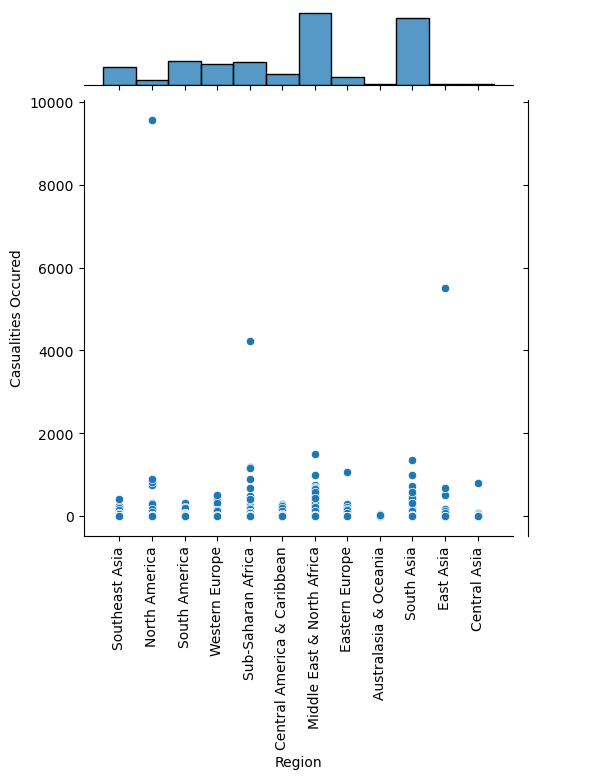

In [33]:
plt.figure(figsize=(20,15))
sns.jointplot(x='Region',y='Casualities Occured',data=df)
plt.xticks(rotation=90)

In [31]:
df['Region'].value_counts()

Middle East & North Africa     44899
South Asia                     41452
South America                  14929
Sub-Saharan Africa             13904
Western Europe                 12648
Southeast Asia                 11281
Central America & Caribbean     6704
Eastern Europe                  4671
North America                   3177
East Asia                        631
Central Asia                     524
Australasia & Oceania            243
Name: Region, dtype: int64

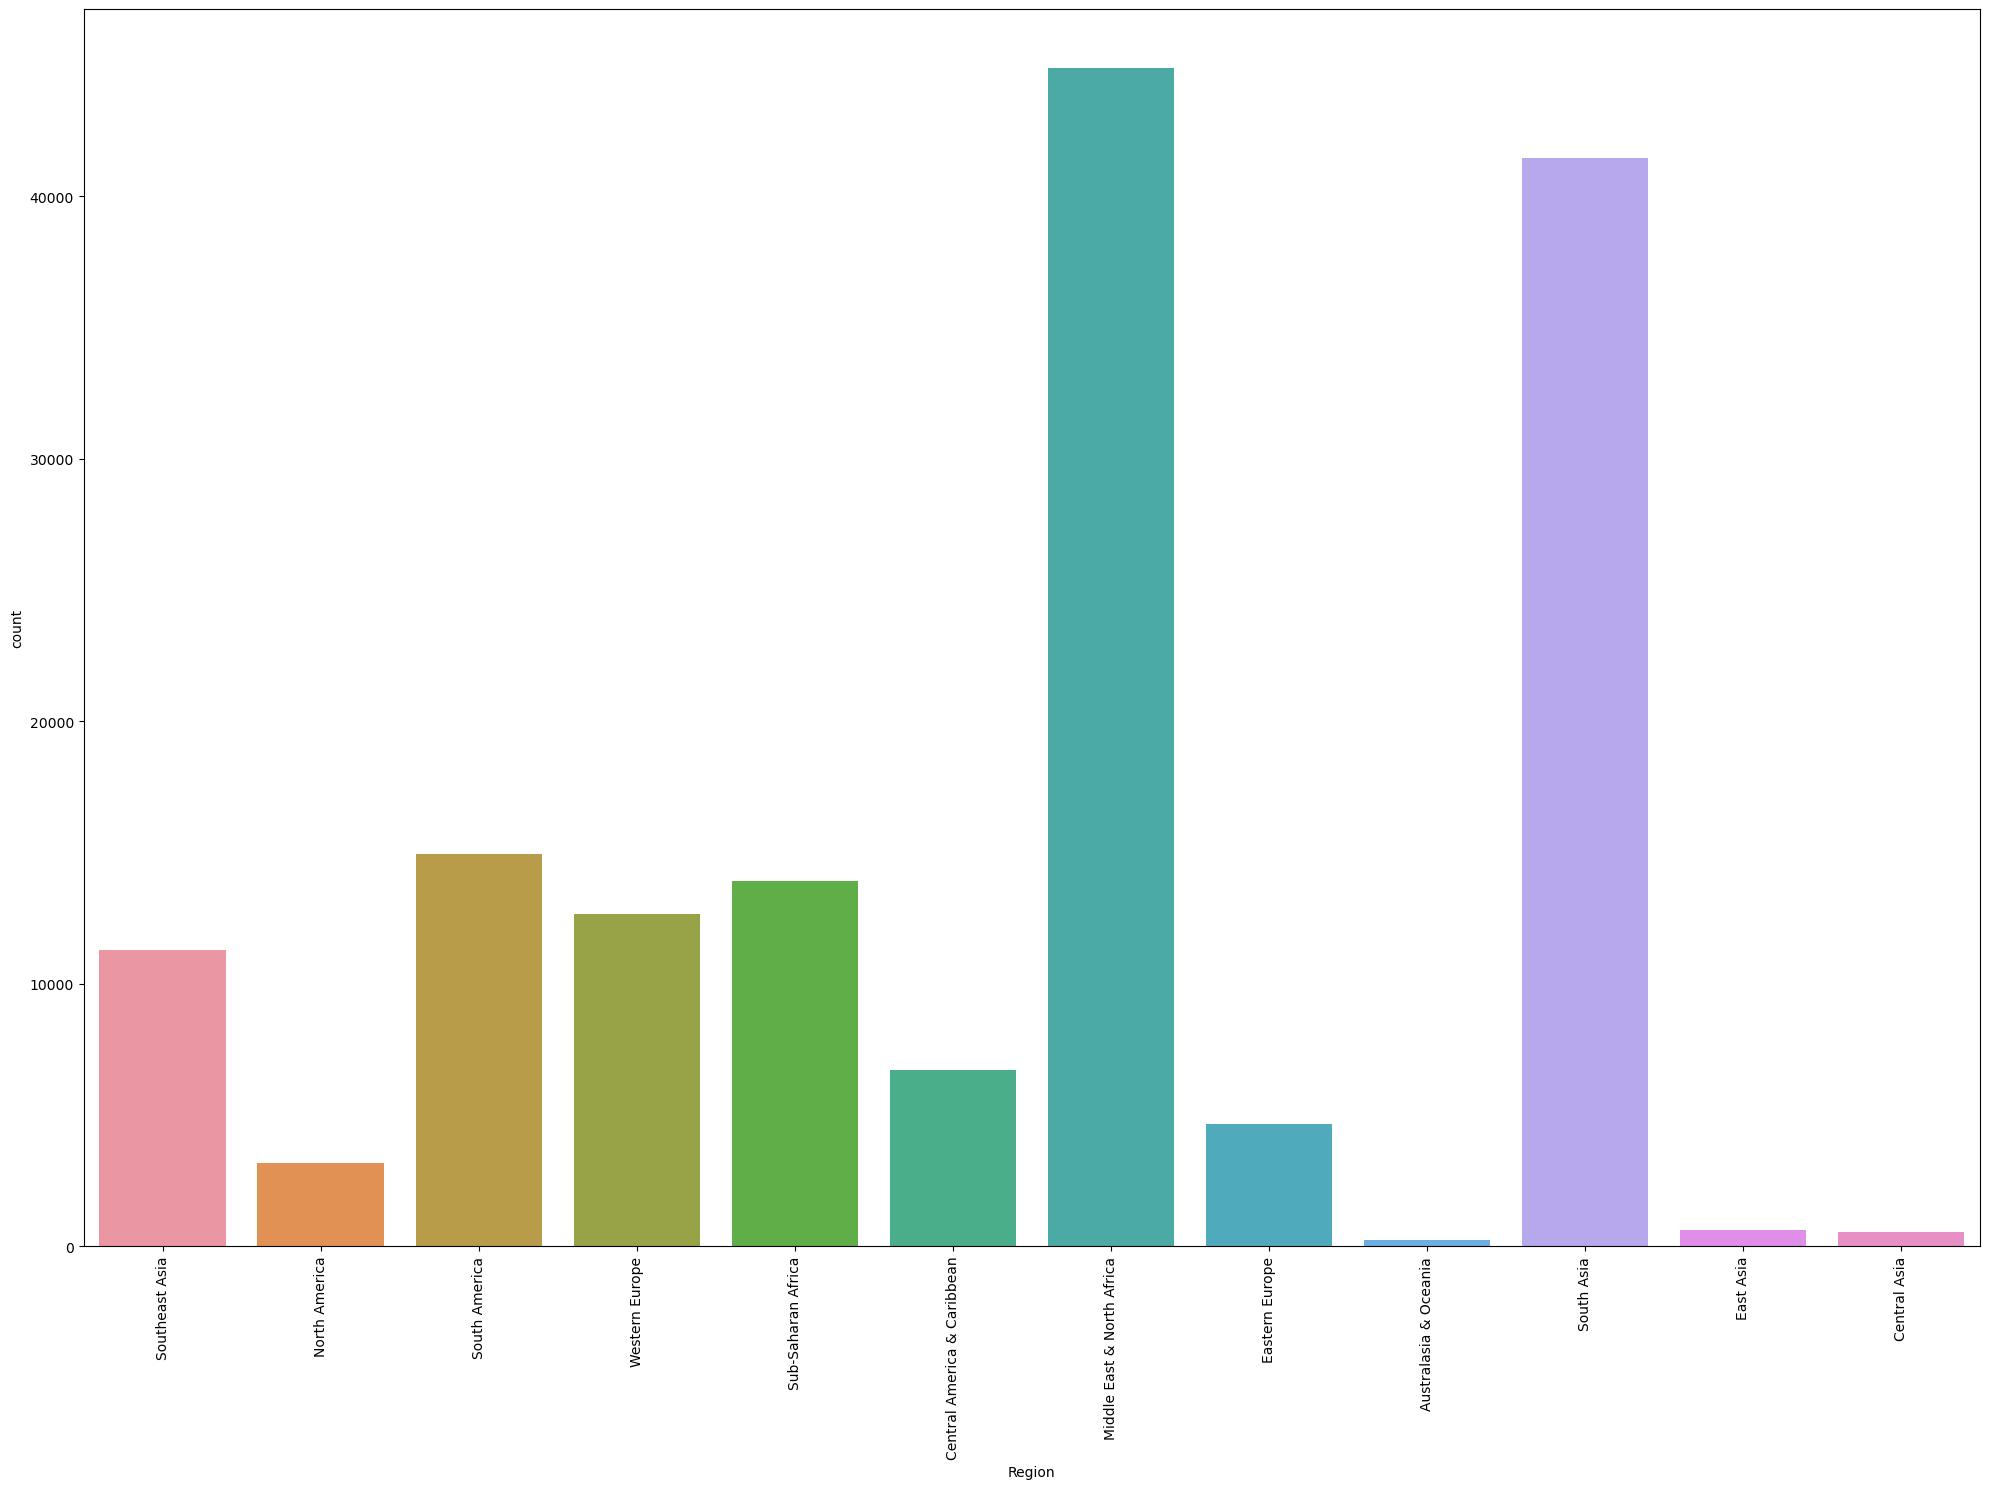

In [32]:
plt.figure(figsize=(20,15))
sns.countplot(x='Region',data=df)
plt.xticks(rotation=90)
plt.tight_layout()

# Observation :
  
  Middle East & North Africa has the highest crime rate with a count of 44899 terrorist activities.
  
  South Asia has the 2nd highest crime rate with a count of 41452 terrorist activities.
  
  South America, Sub-Saharan Africa, Western Europe & Southeast Asia has an average of around 12000 terrorist activities. 
  
  Australasia & Oceania has the lowest crime rate with a count of243 terrorist activities.


Text(0.5, 1.0, 'Number Of Terrorist Activities Occuring Every Year')

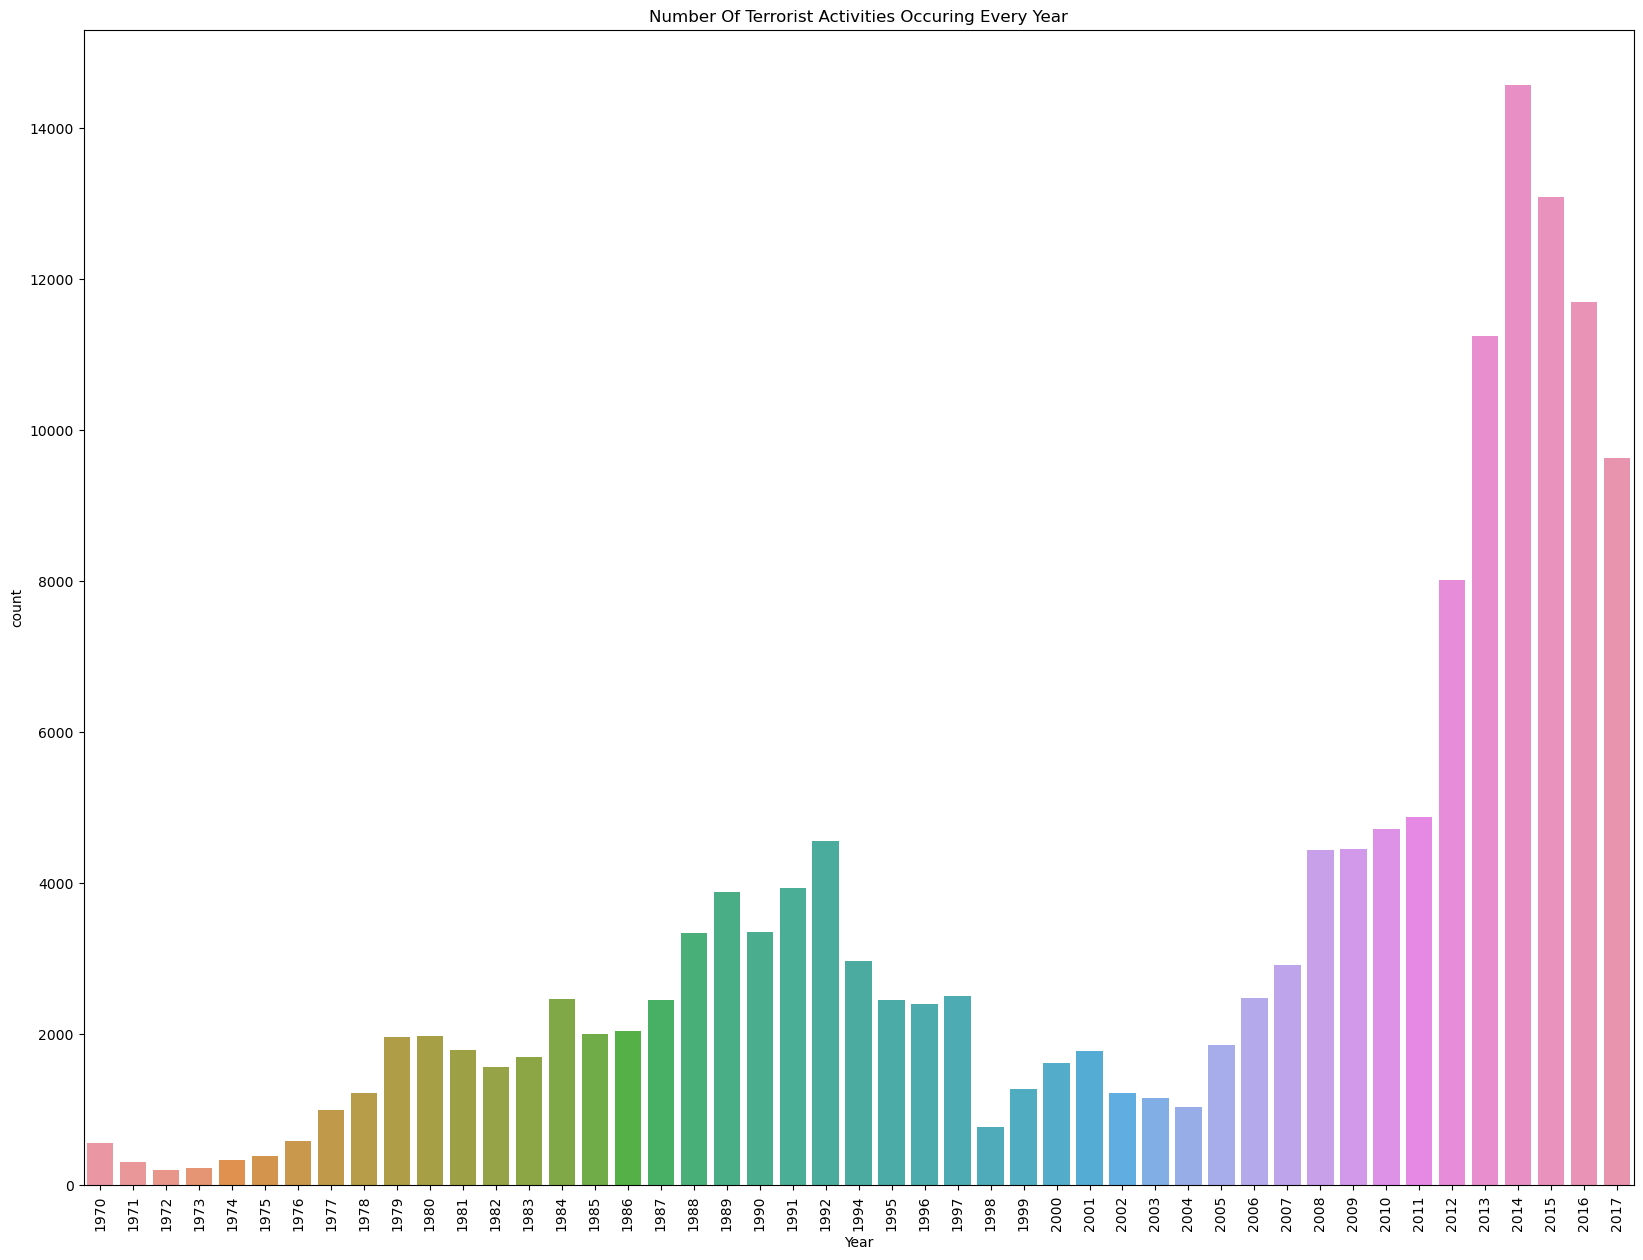

In [35]:
plt.figure(figsize=(20,15))
sns.countplot(x="Year", data=df)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Occuring Every Year')

# Observation

Year 2014 has the highest crime rate with a count of around 15000 casualities.

Year 1972 has the lowest crime rate.

The crime has gradually started increasing from the year 1977 and reached its peak in the year 1992 and gradually decreased by 1998 and after 2006 the crime rate started increasing gradually and reached the highest number of crime rate in 2014.



Text(0.5, 1.0, 'Type Of Targets')

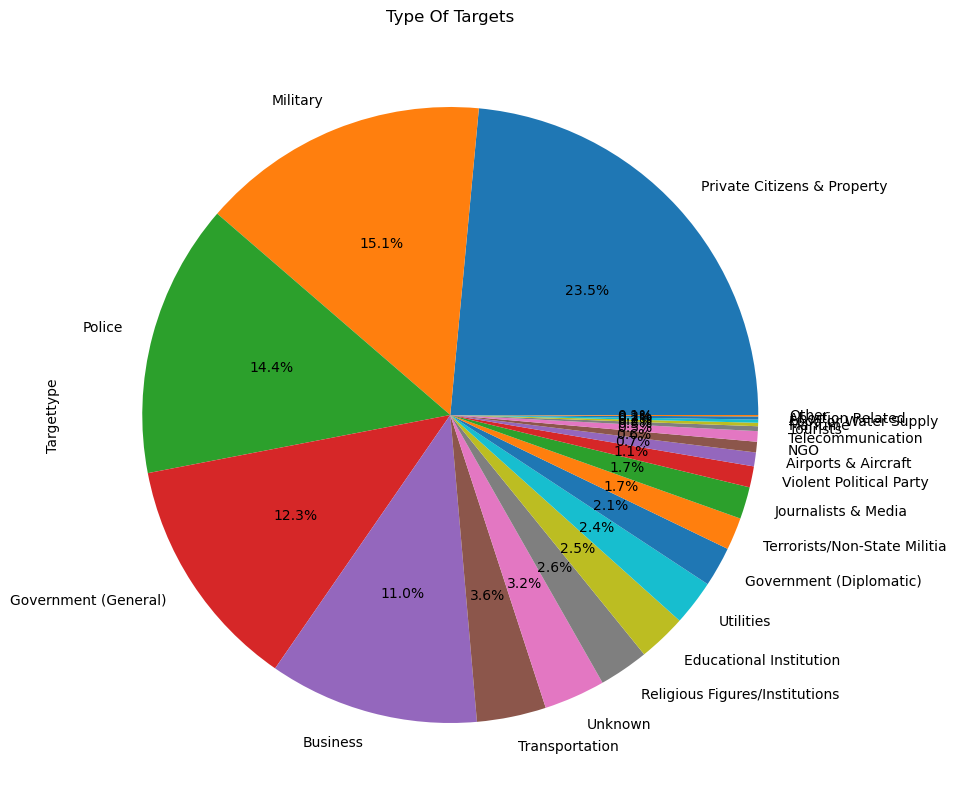

In [39]:
df['Targettype'].value_counts().plot(kind='pie',figsize=[20,10],autopct='%1.1f%%')
plt.title('Type Of Targets')

# Observation

The top 5 targets are :-

   Private Citizens & Property
   
   Military
   
   Police
   
   Government(general)
   
   Business

Text(0.5, 1.0, 'Type of weapons used')

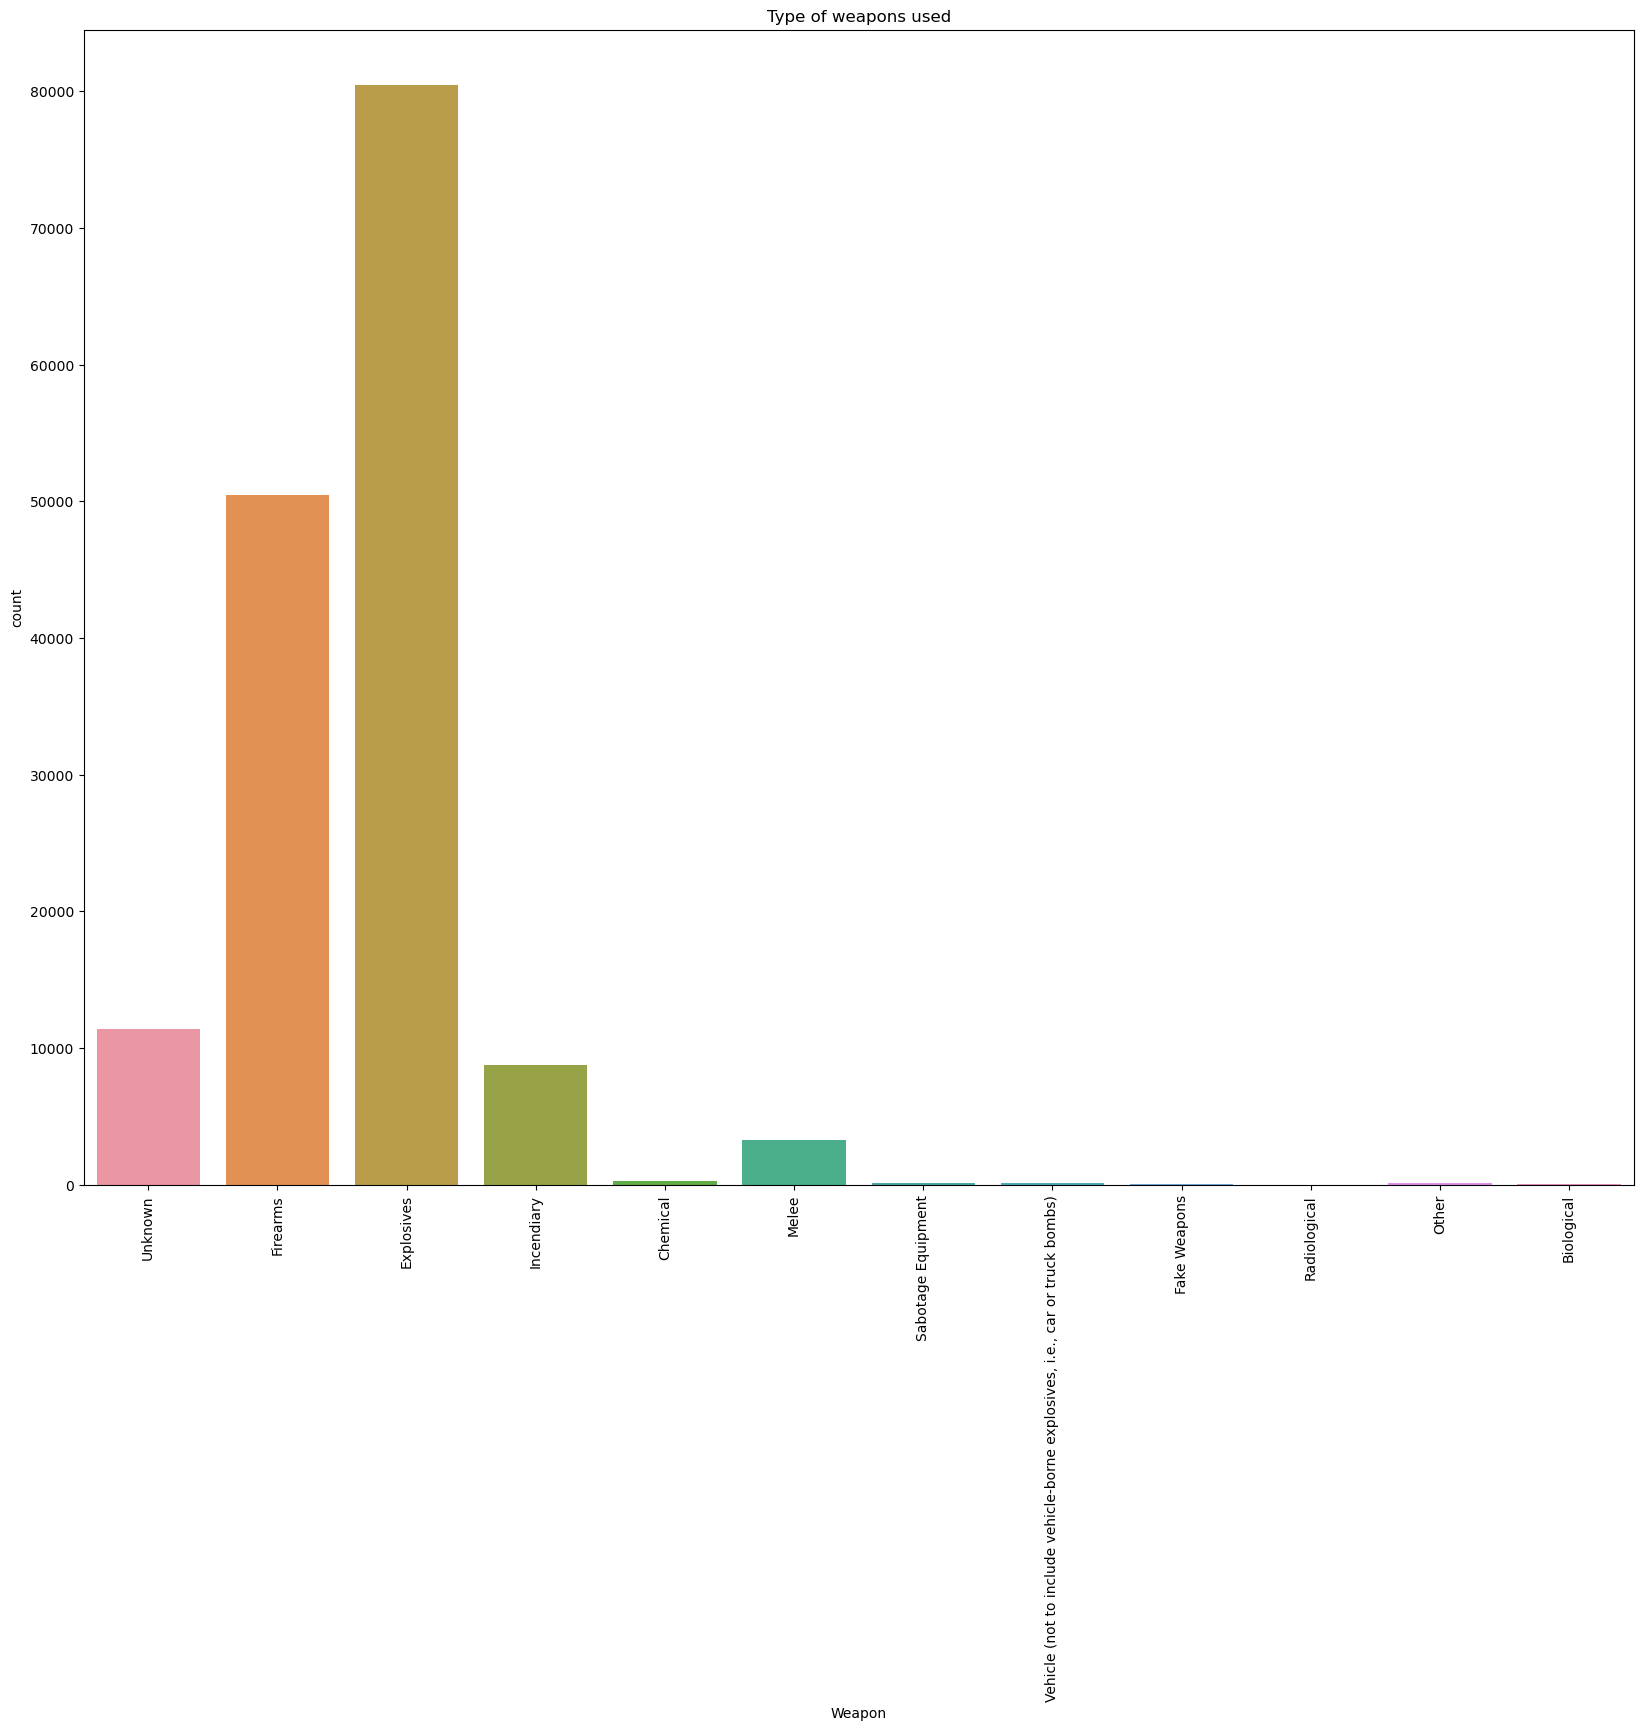

In [40]:
plt.figure(figsize=(20,15))
sns.countplot(x='Weapon',data=df)
plt.xticks(rotation=90)
plt.title('Type of weapons used')

# Observation 

Most of the terrorist activities are done using Explosives & Firearms.

Explosives are the most used weapon and Firearms are the second most used weapon.


Text(0.5, 1.0, 'Types of Attack')

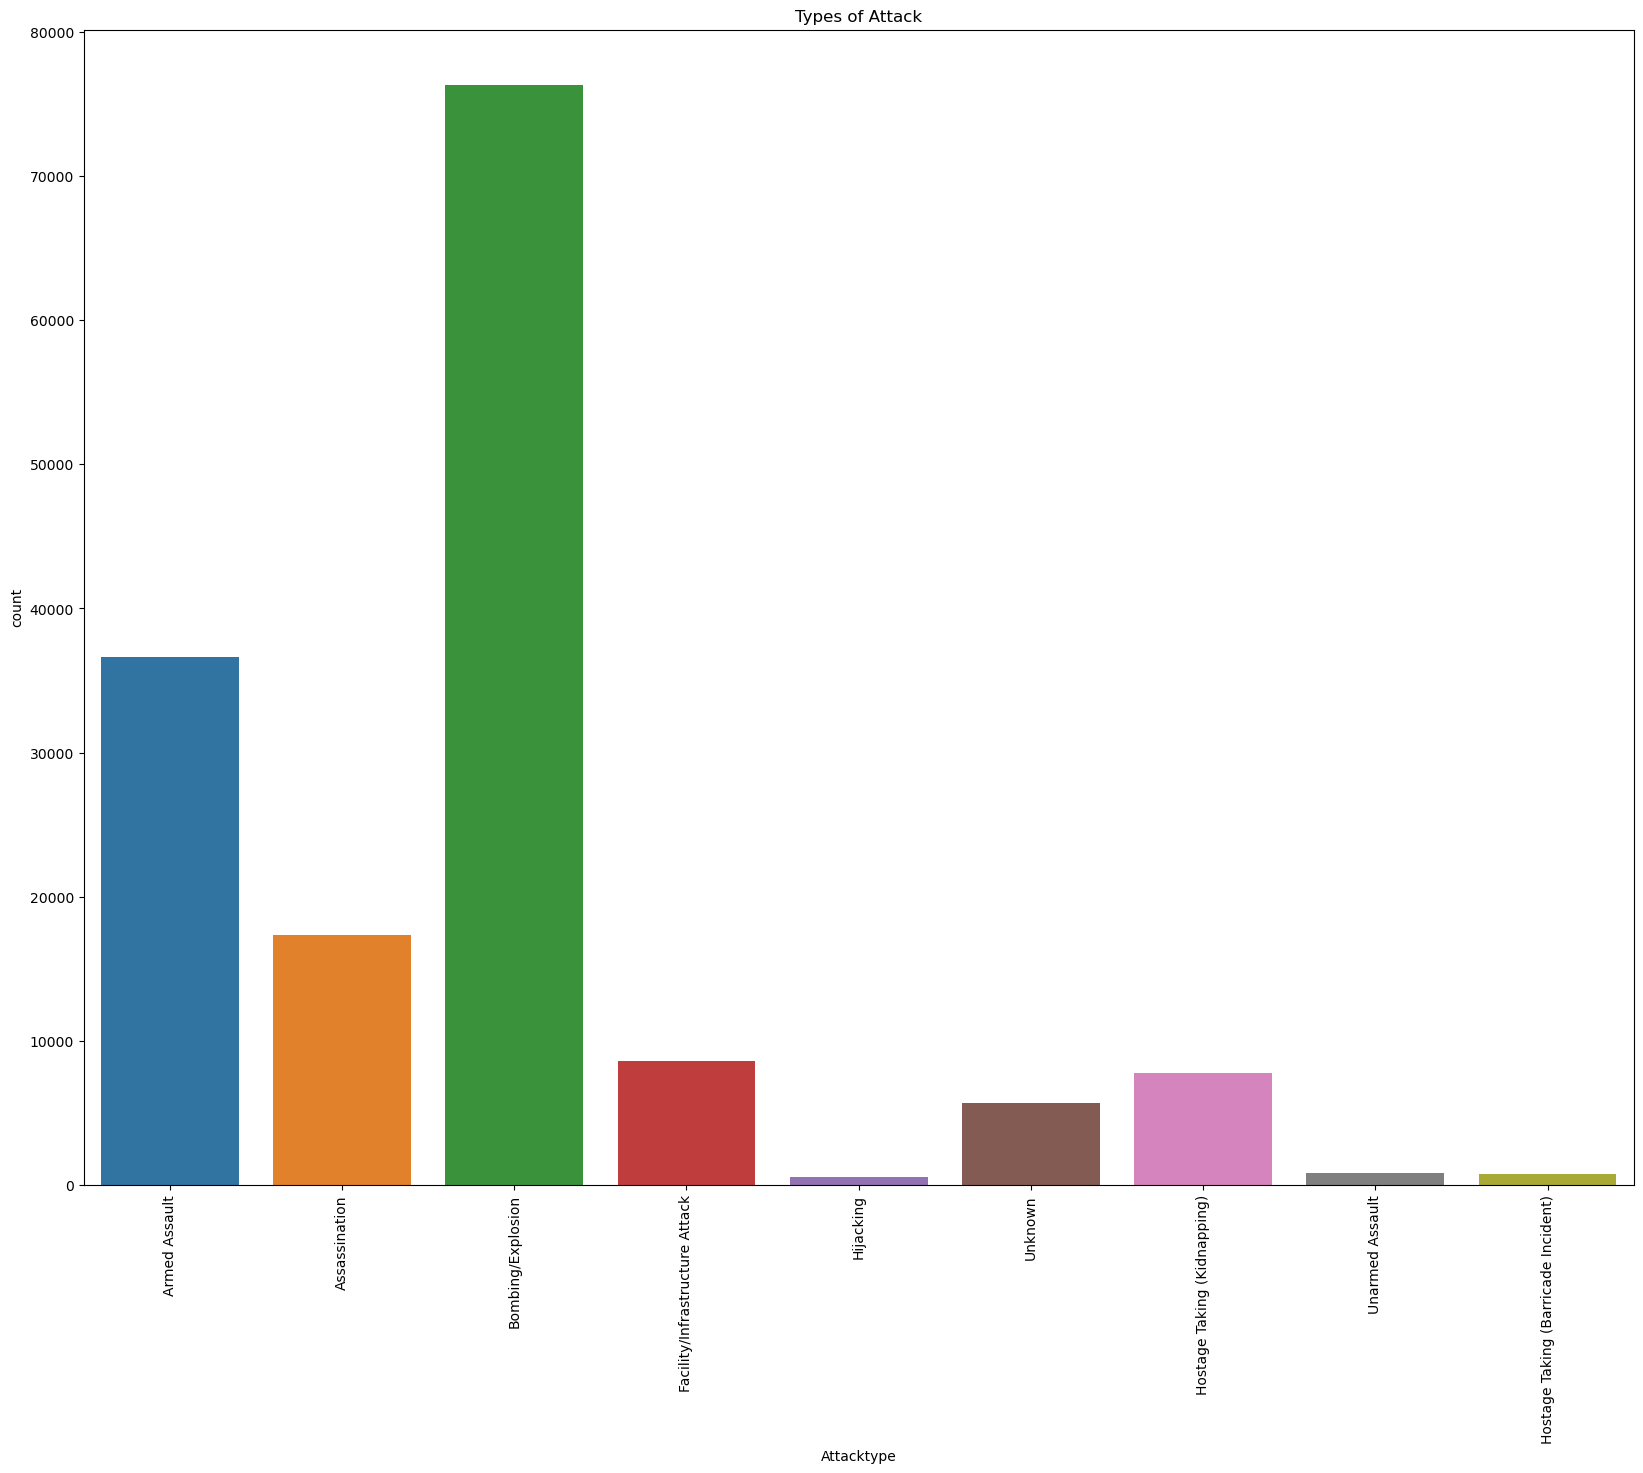

In [43]:
plt.figure(figsize=(20,15))
sns.countplot(x='Attacktype',data=df)
plt.xticks(rotation=90)
plt.title('Types of Attack')

# Observation 

Most of the Terrorist attacks are done by Bombing/Explosion & Armed Assault.

The top 5 attack types are :-

  Bombing/Explosion
  
  Armed Assault
  
  Assassination
  
  Facility/Infrastructure Attack
  
  Kidnapping

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Iraq'),
  Text(1, 0, 'Pakistan'),
  Text(2, 0, 'Afghanistan'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Colombia'),
  Text(5, 0, 'Philippines'),
  Text(6, 0, 'Peru'),
  Text(7, 0, 'Turkey'),
  Text(8, 0, 'Thailand'),
  Text(9, 0, 'United Kingdom'),
  Text(10, 0, 'Somalia'),
  Text(11, 0, 'El Salvador'),
  Text(12, 0, 'Yemen'),
  Text(13, 0, 'Nigeria'),
  Text(14, 0, 'Sri Lanka')])

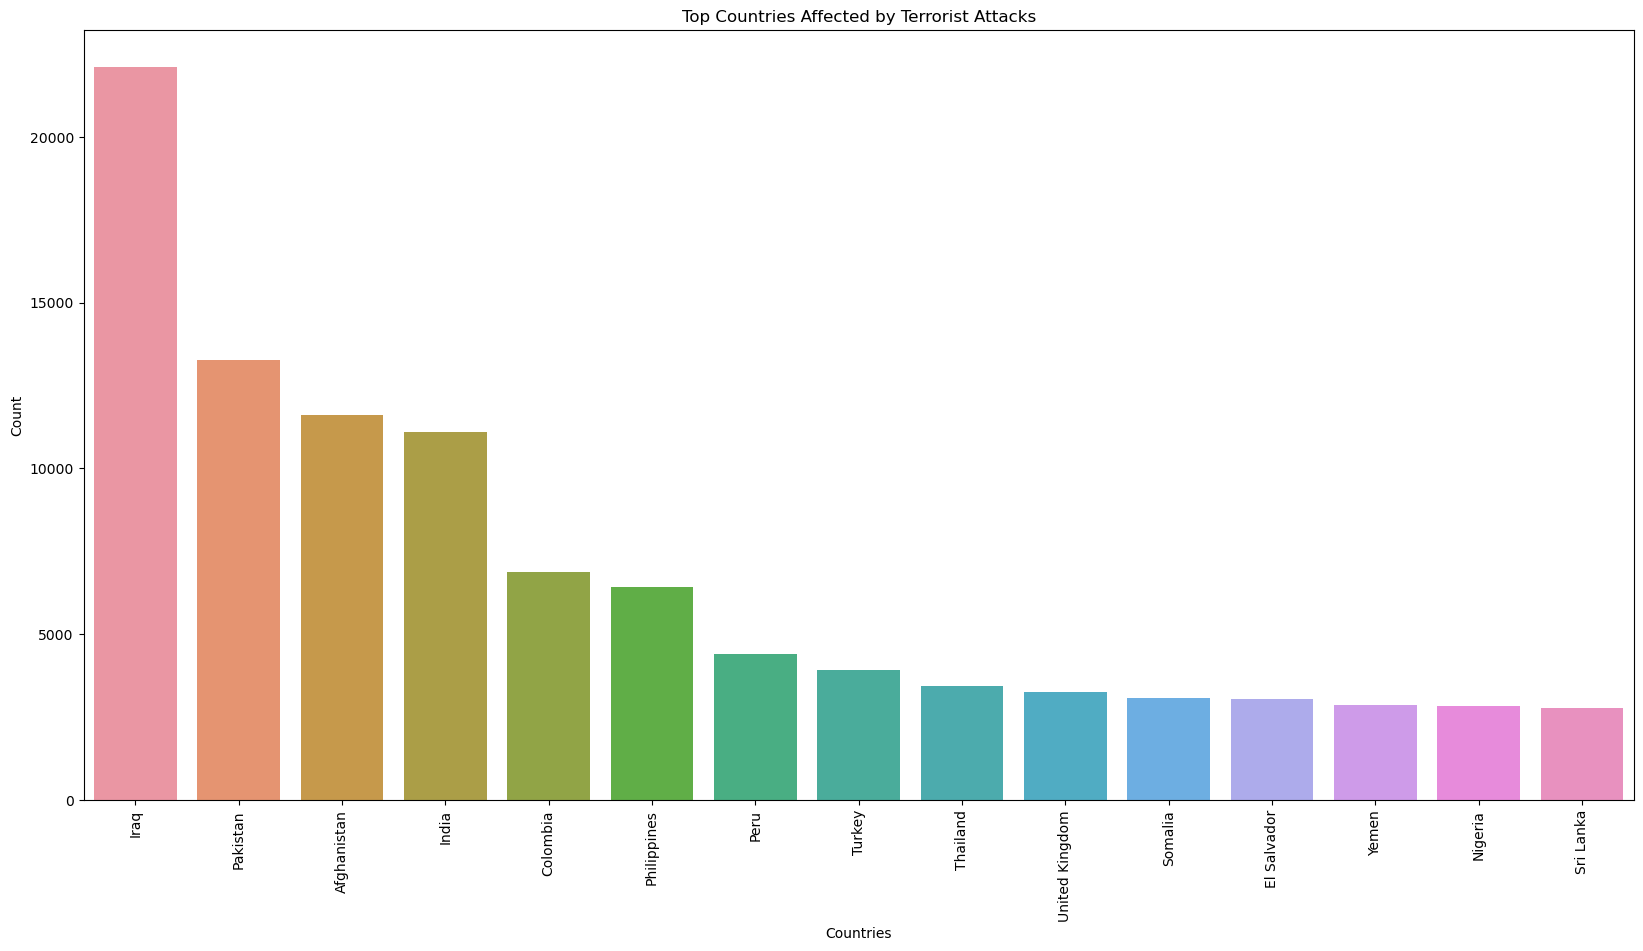

In [48]:
plt.subplots(figsize=(20,10))
sns.barplot(x=df['Country'].value_counts()[:15].index,y=df['Country'].value_counts()[:15].values)
plt.title('Top Countries Affected by Terrorist Attacks')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)

# Observation 

Iraq has the highest number of terrorist activities.

Sri Lanka has the lowest number of terrorist activities.

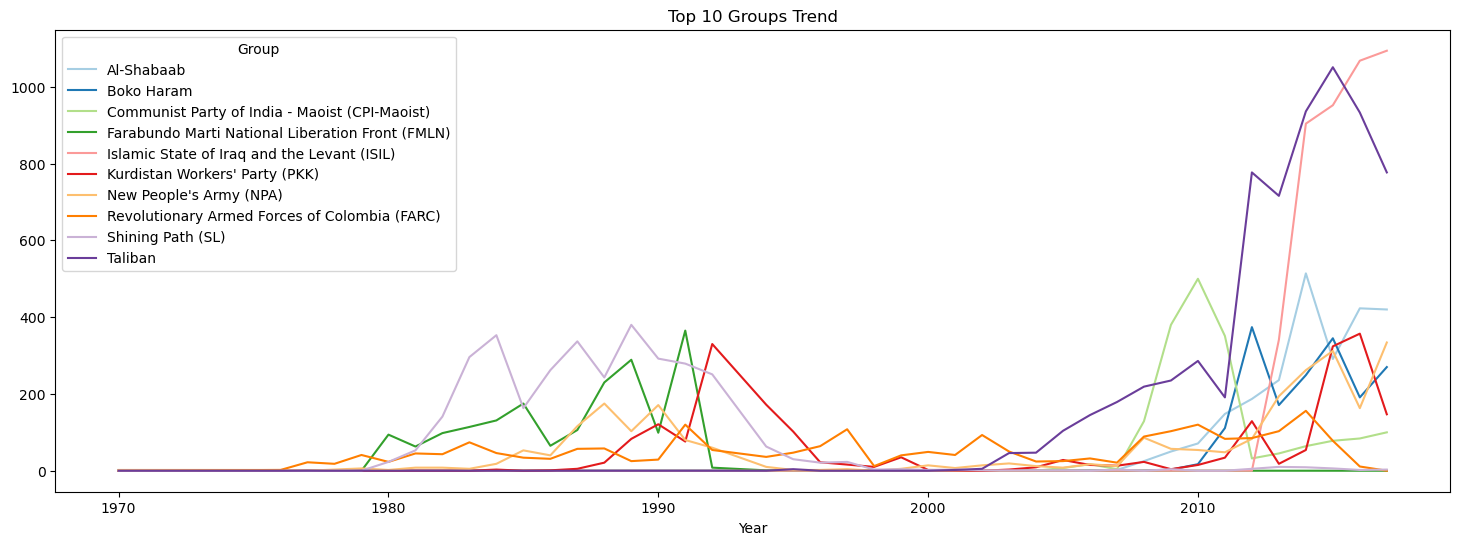

In [50]:
top10=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
pd.crosstab(top10.Year,top10.Group).plot(color=sns.color_palette('Paired',15))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Top 10 Groups & their Trends")
plt.show()

# Observation

Taliban has the highest crime rate and the group has been in action since 1970 and reached its peak in 2014.

# Conclusion 

   Middle East & North Africa has the highest crime rate with a count of 44899 terrorist activities.
   
   Year 2014 has the highest crime rate with a count of around 15000 casualities.
   
   The top 5 targets are :-

       Private Citizens & Property

       Military

       Police

       Government(general)

       Business
   
   Most of the Terrorist attacks are done by Bombing/Explosion & Armed Assault.
   
   Iraq has the highest number of terrorist activities.
   
   Taliban has the highest crime rate and the group has been in action since 1970 and reached its peak in 2014.